### Beta

In [19]:
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression
import yfinance as yf
yf.pdr_override()

In [41]:
tickers = ['^N225','^GSPC']
start = dt.datetime(1970, 3, 5)

end = dt.datetime(2023, 4, 1)

data = pdr.get_data_yahoo(tickers, start, end, interval="3mo")

[*********************100%***********************]  2 of 2 completed


In [42]:
data = data['Adj Close']

In [43]:
log_returns = np.log(data/data.shift())

In [44]:
log_returns

,^GSPC,^N225
Date,,
1984-12-01,NaN,NaN
1985-03-01,0.045162,0.034815
1985-06-01,-0.004865,-0.003558
1985-09-01,0.069321,0.003935
1985-12-01,0.115489,0.066496
...,...,...
2022-03-01,-0.056866,0.027990
2022-06-01,-0.043817,0.029322
2022-09-01,0.031143,-0.004372


In [45]:
cov = log_returns.cov()

In [46]:
var = log_returns['^GSPC'].var()

In [47]:
var

0.006200040162891368

In [48]:
cov.loc['^N225', '^GSPC']/var

0.781055907008086

In [49]:
cov.loc['^GSPC']/var

^GSPC    1.000000
^N225    0.781056
Name: ^GSPC, dtype: float64

In [50]:
X = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_returns['^N225'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(X, Y)

lin_regr.coef_[0, 0]

0.7810559070080867

In [51]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


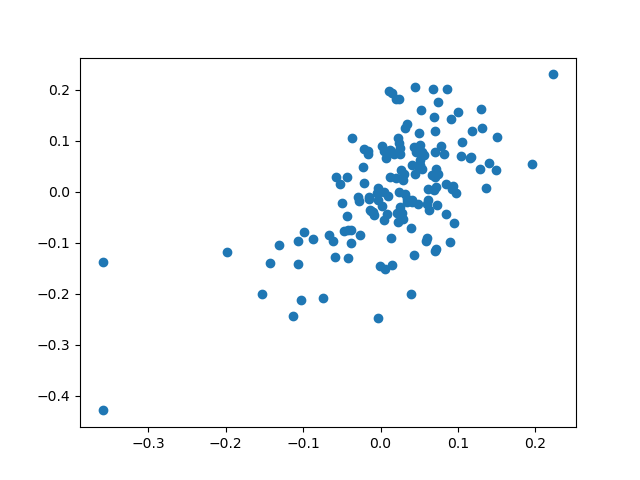

In [52]:
fig, ax = plt.subplots()
ax.scatter(X, Y)